In [10]:
import os
import shutil
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras.losses import CategoricalCrossentropy
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model
import matplotlib.pyplot as plt

In [3]:
def organize_images():
    # Define the paths
    train_dir = "data/raw/train"
    cat_dir = os.path.join(train_dir, "cat")
    dog_dir = os.path.join(train_dir, "dog")

    # Create directories if they don't exist
    os.makedirs(cat_dir, exist_ok=True)
    os.makedirs(dog_dir, exist_ok=True)

    # Iterate over the files in the train directory
    for filename in os.listdir(train_dir):
        file_path = os.path.join(train_dir, filename)
        if os.path.isfile(file_path):  # Ensure it's a file
            if filename.startswith("cat"):
                shutil.move(file_path, os.path.join(cat_dir, filename))
            elif filename.startswith("dog"):
                shutil.move(file_path, os.path.join(dog_dir, filename))

    print("Images organized successfully.")

if __name__ == "__main__":
    organize_images()

Images organized successfully.


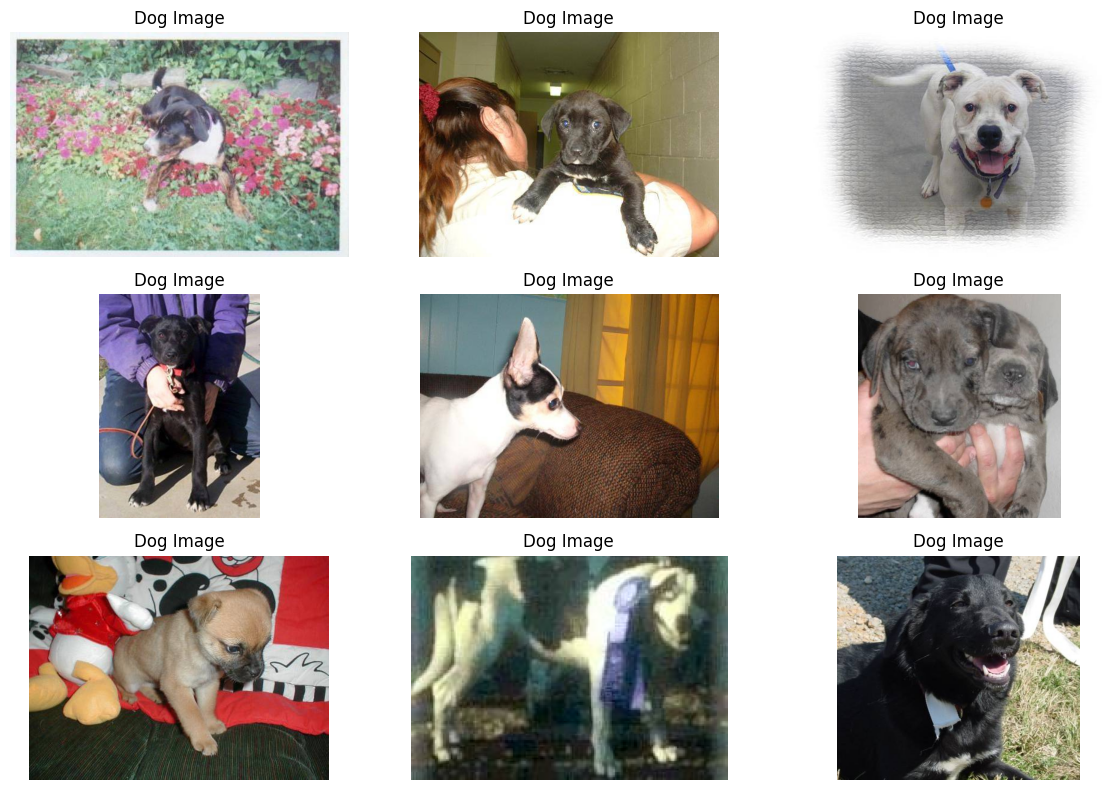

In [4]:
# Import and Check first 9 Dog Pictures

# Path to the directory containing your image data
data_dir = "./data/raw/train"

# Get a list of all dog image file names
dog_subfolder = os.path.join(data_dir, "dog")

# Get a list of all dog image file names
dog_image_files = os.listdir(dog_subfolder)

# Load the first nine dog images
dog_images = []
for i in range(9):
    img_path = os.path.join(dog_subfolder, dog_image_files[i])
    img = image.load_img(img_path)  # Adjust target_size as needed
    img_array = image.img_to_array(img)
    img_array /= 255.0  # Normalize pixel values to [0, 1]
    dog_images.append(img_array)

# Create a single figure to display all nine images
plt.figure(figsize=(12, 8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_images[i])
    plt.title('Dog Image')
    plt.axis('off')

# Adjust Layout
plt.tight_layout()

# Show the pictures
plt.show()

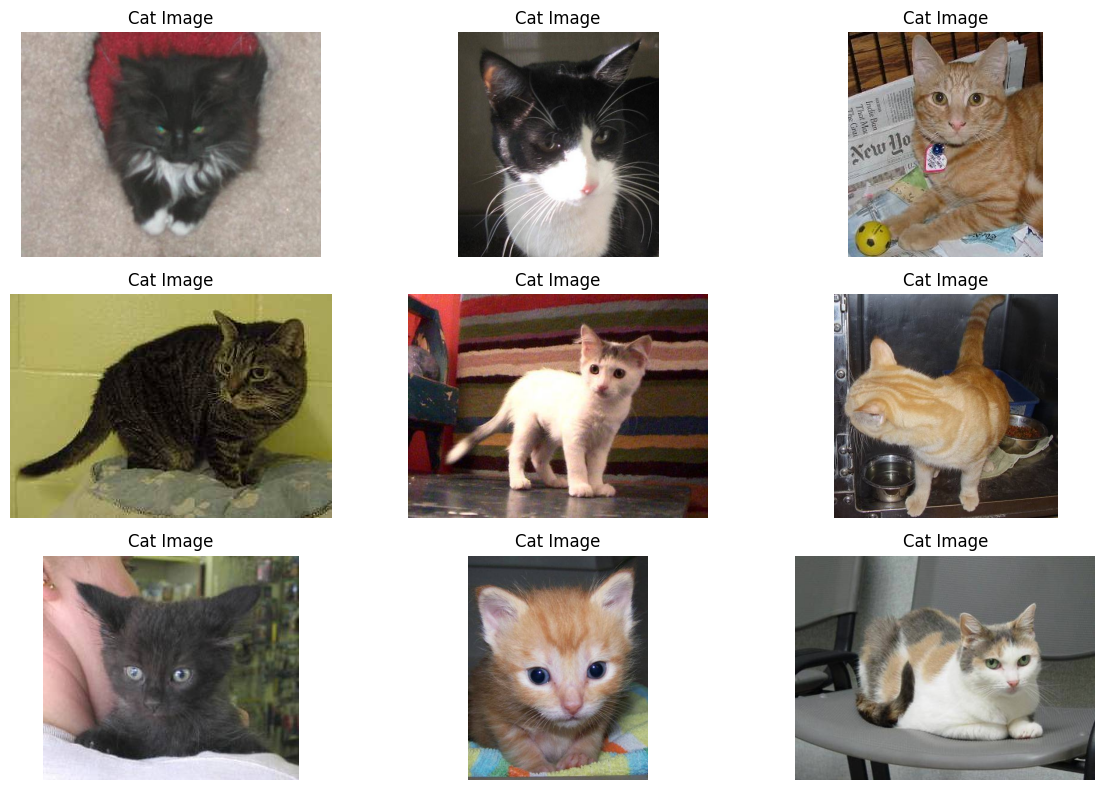

In [5]:
# Import and Check first 9 Cat Pictures

# Path to the directory containing your image data
data_dir = "./data/raw/train"

# Get a list of all dog image file names
cat_subfolder = os.path.join(data_dir, "cat")

# Get a list of all dog image file names
cat_image_files = os.listdir(cat_subfolder)

# Load the first nine cat images
cat_images = []
for i in range(9):
    img_path = os.path.join(cat_subfolder, cat_image_files[i])
    img = image.load_img(img_path)  # Adjust target_size as needed
    img_array = image.img_to_array(img)
    img_array /= 255.0  # Normalize pixel values to [0, 1]
    cat_images.append(img_array)

# Create a single figure to display all nine images
plt.figure(figsize=(12, 8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cat_images[i])
    plt.title('Cat Image')
    plt.axis('off')

# Adjust Layout
plt.tight_layout()

# Show the pictures
plt.show()

In [11]:
train_dir = "./data/raw/train"
test_dir = "./data/raw"
image_size = (200, 200)

datagentrain = ImageDataGenerator(rescale=1.0/255)
datagentest = ImageDataGenerator(rescale=1.0/255)

train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes = ['dog','cat']
)

test_data = datagentest.flow_from_directory(
    test_dir,
    target_size = image_size,
    batch_size=1,
    classes=['test'],
    shuffle=False
)

Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


In [25]:
model = Sequential()

model.add(Conv2D(input_shape=(200,200,3), filters=16, kernel_size=(3,3), padding='valid', activation=None))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = "valid", activation = None))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPool2D(pool_size =(2,2),strides =(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
model.fit(train_data, epochs=1)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1013s 1s/step - accuracy: 0.6354 - loss: 0.6738


In [52]:
model.save('dog_cat_2xConv2d_1xMaxPool_1xDense128.keras')

In [12]:
saved_model = load_model('dog_cat_2xConv2d_1xMaxPool_1xDense128.keras')

2025-02-06 17:28:52.237445: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [9]:
train_data.class_indices

{'dog': 0, 'cat': 1}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


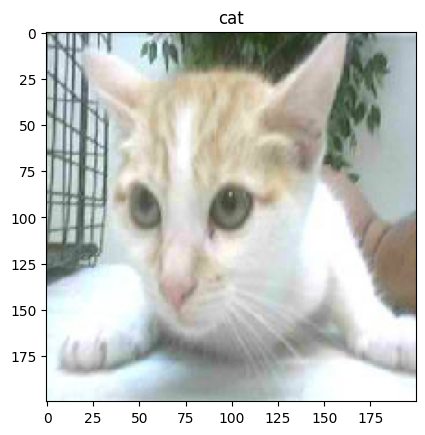

In [17]:
# Predict a random image

rand_num = np.random.randint(1,12500)
path_to_rand = './data/raw/test/' + str(rand_num) + '.jpg'

img = image.load_img(path_to_rand, target_size=(200,200))

img = np.asarray(img)

plt.imshow(img)

img = np.expand_dims(img, axis=0)

output = saved_model.predict(img)

if output[0][0] > output[0][1]:
    plt.title('dog')
else:
    plt.title('cat')
